In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
items = pd.read_parquet('../etl/datos/items.parquet')

In [7]:
games = pd.read_parquet('../etl/datos/games.parquet')

**----------------------------------------------------------------items----------------------------------------------------------------**
* obtenemos un vista general de los datos con describe()

In [15]:
items.describe(include='all')

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
count,3285246,3.285246e+06,3285246,3.285246e+06,3.285246e+06
unique,68403,NaN,10024,NaN,NaN
top,chidvd,NaN,Counter-Strike: Global Offensive,NaN,NaN
freq,3475,NaN,43279,NaN,NaN
mean,NaN,1.772373e+05,NaN,1.555251e+03,1.428156e+01
std,NaN,1.266741e+05,NaN,6.721032e+03,1.756221e+02
min,NaN,1.000000e+01,NaN,1.000000e+00,0.000000e+00
25%,NaN,3.912000e+04,NaN,4.400000e+01,0.000000e+00
50%,NaN,2.149500e+05,NaN,2.050000e+02,0.000000e+00
75%,NaN,2.630600e+05,NaN,8.080000e+02,0.000000e+00


In [7]:
items.head()

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6.0,0.0
1,76561197970982479,30,Day of Defeat,7.0,0.0
2,76561197970982479,300,Day of Defeat: Source,4733.0,0.0
3,76561197970982479,240,Counter-Strike: Source,1853.0,0.0
4,76561197970982479,3830,Psychonauts,333.0,0.0


*¿cuales son los juegos que tienen mas presencia entre los usuarios?*
+ cuales son los mas jugados de todos, de los miles de juegos que hay se extrae un top20

In [8]:
min_jugados = items.groupby('item_name')['playtime_forever'].sum()
top20 = min_jugados.sort_values(ascending=False).head(20)

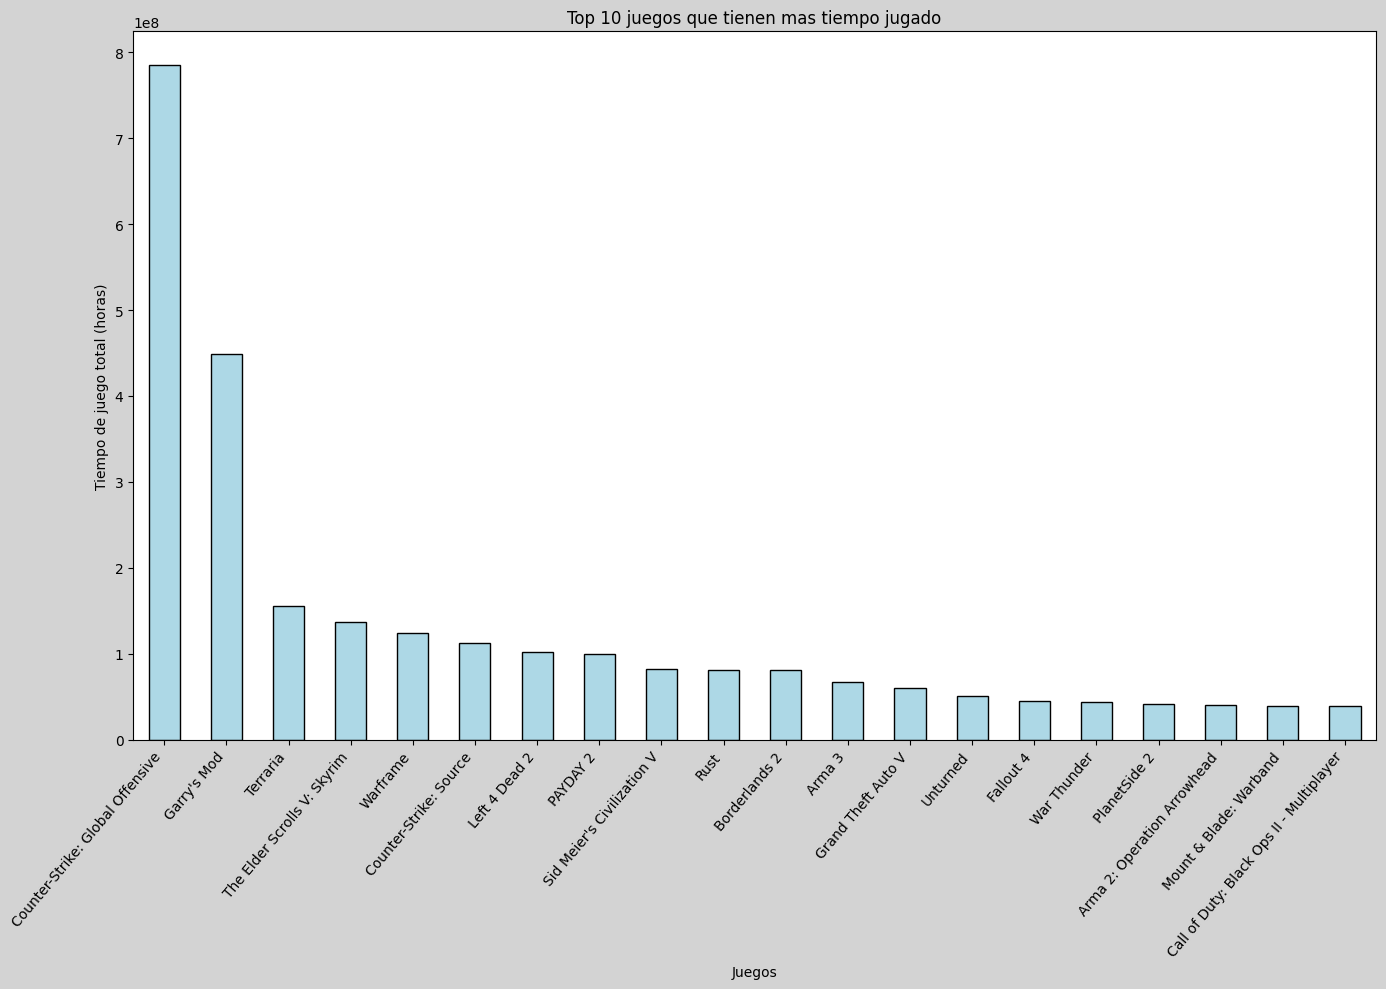

In [9]:
# *ajusto el tamaño del grafico a una medida legible desde mi monitor
plt.figure(figsize=(14, 10)).set_facecolor('lightgrey')
top20.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Juegos')
plt.ylabel('Tiempo de juego total (horas)')
plt.title('Top 10 juegos que tienen mas tiempo jugado')
#rotamos un poco el angulo de los etiquetas x para poder visualizarlos mejor
plt.xticks(rotation=50, ha='right')
plt.tight_layout()

plt.show()

In [10]:
games.head()

,genres,title,id,release_year
0,"[Strategy, Action, Indie, Casual, Simulation]",Lost Summoner Kitty,761140,2018
1,"[Free to Play, Strategy, Indie, RPG, Card Game...",Ironbound,643980,2018
2,"[Free to Play, Simulation, Sports, Casual, Ind...",Real Pool 3D - Poolians,670290,2017
3,"[Action, Adventure, Casual]",弹炸人2222,767400,2017
4,"[Action, Adventure, Simulation, FPS, Shooter, ...",Battle Royale Trainer,772540,2018


*para poder crear la primera funcion vamos a necesitar dos dataframes* **games** *y* **items**
*de los cuales las columnas que ayudaran a poder crear un conteo son las columnas* (**genre, item_id, release_date**) *de* **games** *y las columnas* (**item_id, playtime_forever**) *de* **items**

In [15]:
games.rename(columns={'id':'item_id'}, inplace=True)
games = games[['item_id','genres','release_year']]

*unificamos en un dataframe para realizar las consultas*

In [ ]:
items_games_general = games.merge(items, left_on='item_id', right_on= 'item_id',how='inner')

In [12]:
items_games_general.shape

(2809932, 7)

In [14]:
items_games_general.head(20)

,item_id,genres,release_year,user_id,item_name,playtime_forever,playtime_2weeks
0,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,UTNerd24,Carmageddon Max Pack,5.0,0.0
1,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,saint556,Carmageddon Max Pack,13.0,0.0
2,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,chidvd,Carmageddon Max Pack,110.0,0.0
3,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,aerpub,Carmageddon Max Pack,13.0,0.0
4,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,lucifer666678,Carmageddon Max Pack,8.0,0.0
5,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,FilthyDeath,Carmageddon Max Pack,12.0,0.0
6,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,76561198018144075,Carmageddon Max Pack,49.0,0.0
7,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,666NeCrO,Carmageddon Max Pack,261.0,0.0
8,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,76561198001688490,Carmageddon Max Pack,2.0,0.0
9,282010,"[Racing, Action, Classic, Indie, Gore, 1990's,...",1997,76561197974288321,Carmageddon Max Pack,14.0,0.0


para la consulta1 playtime_genre utilizamos las columnas: release_year, genres, playtime_forever,item_id

In [4]:
items_games = items_games_general[['release_year', 'genres', 'playtime_forever']]
items_games = items_games.explode('genres').reset_index()
items_games.head()

,index,release_year,genres,playtime_forever,item_id
0,0,1997,Racing,5.0,282010
1,0,1997,Action,5.0,282010
2,0,1997,Classic,5.0,282010
3,0,1997,Indie,5.0,282010
4,0,1997,Gore,5.0,282010


antes de sumar los tiempos de jugabilidad, graficamos los datos crudos para chequear algun outlier que pueda sesgar la consulta
* desanidamos los generos

In [16]:
games = games.explode('genres')
games['release_year'] = games['release_year'].astype(int)
games.head()

,item_id,genres,release_year
0,761140,Strategy,2018
0,761140,Action,2018
0,761140,Indie,2018
0,761140,Casual,2018
0,761140,Simulation,2018


In [ ]:
games['release_year'].describe(include='all')

count    157914.000000
mean       2014.595755
std          14.671598
min        1970.000000
25%        2014.000000
50%        2016.000000
75%        2017.000000
max        5275.000000
Name: release_year, dtype: float64

In [ ]:
year = games['release_year'].value_counts()
year = year.sort_index(axis='index', ascending=False)
print(year)

release_year
5275        3
2021        3
2019       14
2018      792
2017    45410
2016    35683
2015    27550
2014    16841
2013     8321
2012     6062
2011     3469
2010     2692
2009     2069
2008     1355
2007     1144
2006     1053
2005      774
2004      605
2003      658
2002      369
2001      512
2000      287
1999      359
1998      372
1997      306
1996      233
1995      233
1994      195
1993      173
1992       74
1991       58
1990       51
1989       62
1988       35
1987       32
1986        6
1985       10
1984       18
1983       15
1982        7
1981        4
1980        1
1975        1
1970        3
Name: count, dtype: int64


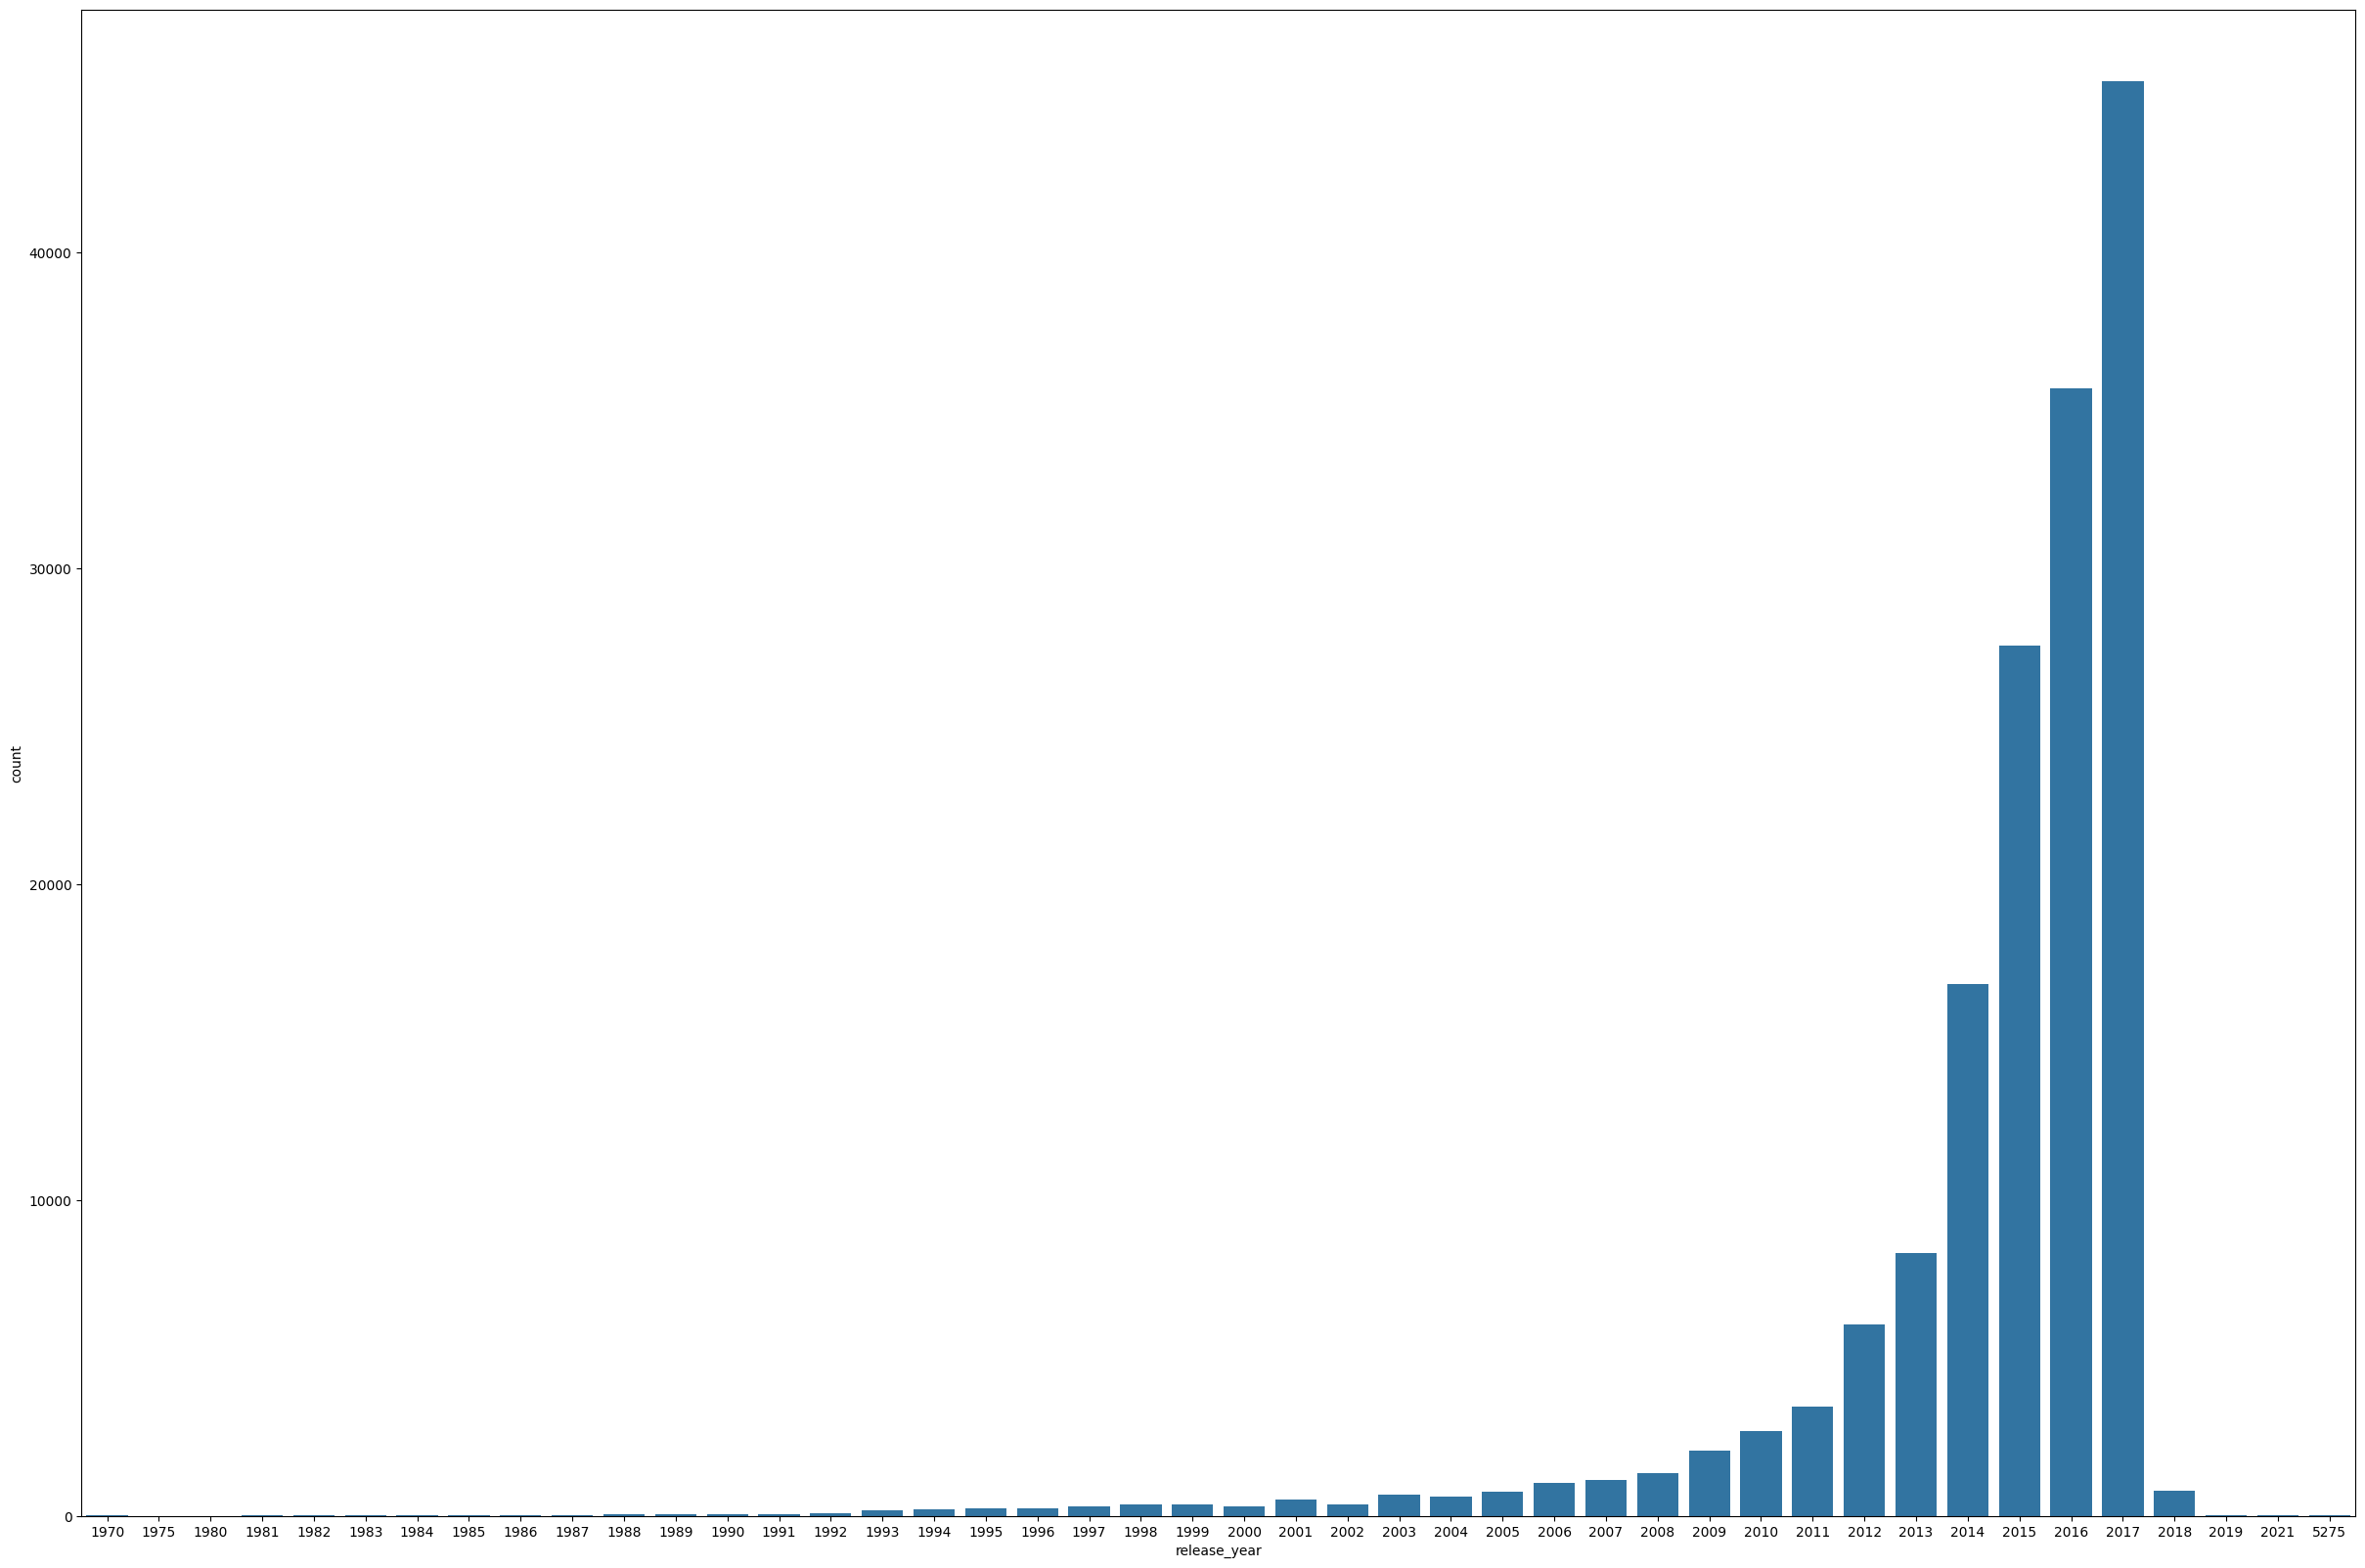

In [ ]:
#las dimensiones son grandes debido a que estoy consultando mas de 30 segmentaciones en el eje X
#de esta manera se logra apreciar mas la diferencia año tras año
plt.figure(figsize=(30,20))
sns.barplot(x=year.index,y=year)
plt.show()

en las muestras de cantidad de juegos por año, el recuento nos da outliers como 5275, 2021, 2019, y 2018. Del 2019 al 2021 podria considerarse debido al brote de la pandemia, el de 5275 se puede interpretar como un error de tipeo y el de 2018 como fallas al cargar los datos
+ tomaremos un muestreo desde 1970 al 2017 donde tenemos un incremento gradual de videojuegos
+ volvemos a graficar para corroborar los datos

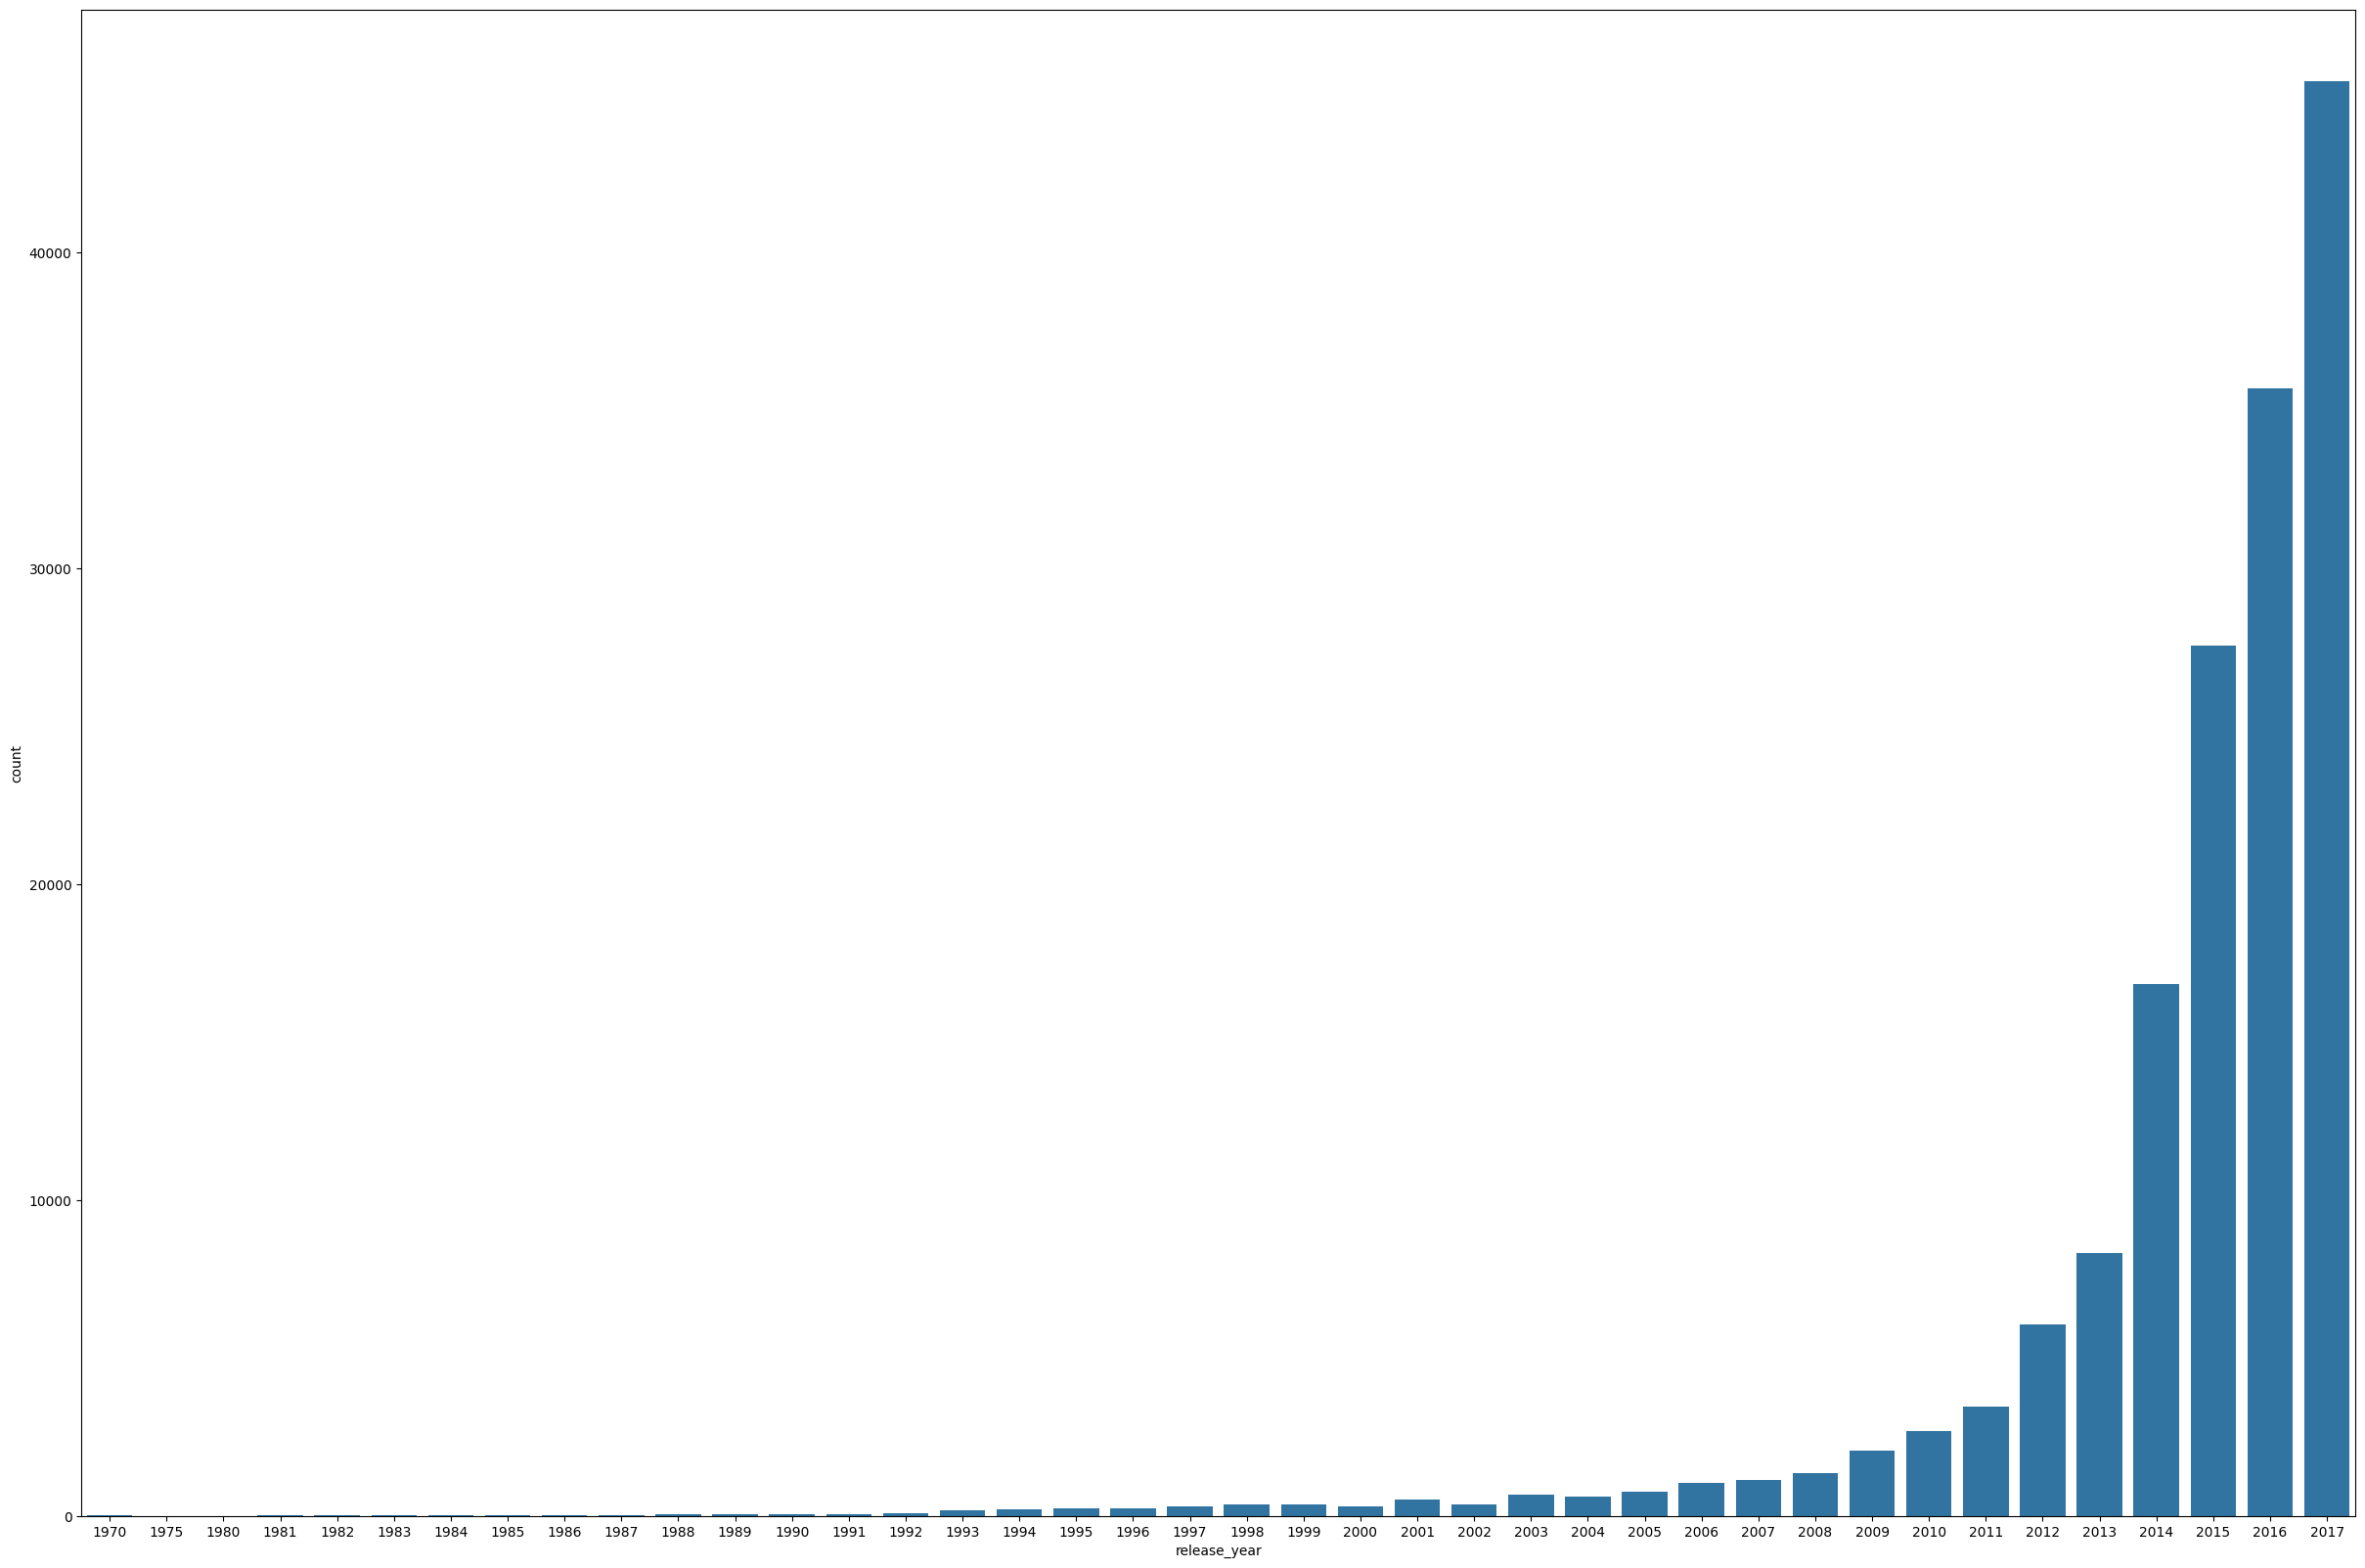

In [ ]:
games = games[(games['release_year']>=1970) & (games['release_year']<=2017)]
year = games['release_year'].value_counts()
year = year.sort_index(axis='index', ascending=False)
plt.figure(figsize=(30,20))
sns.barplot(x=year.index,y=year)
plt.show()

+ convertimos la columna release_year a tipo int
+ filtramos los años
+ y eliminamos la columna index

In [10]:
items_games['release_year'] = items_games['release_year'].astype(int)
items_games = items_games[(items_games['release_year']>=1970) & (items_games['release_year']<=2018)]
items_games.drop('index', axis=1, inplace=True)

agrupamos los datos por los años y el tipo de genero, y sumamos el valor de la columna playtime

In [15]:
items_games = items_games.groupby(['release_year', 'genres']).sum().reset_index()
#items_games.head()

NameError: name 'items_games' is not defined

In [34]:
items_games.tail(50)

,release_year,genres,playtime_forever,item_id
4333,2017,Strategy,29419834.0,8839732460
4334,2017,Strategy RPG,10102.0,8389600
4335,2017,Stylized,6424.0,10217400
4336,2017,Supernatural,1693060.0,193197100
4337,2017,Surreal,5520.0,23807860
4338,2017,Survival,99127601.0,19697990060
4339,2017,Survival Horror,1106695.0,1495729190
4340,2017,Swordplay,6424.0,10217400
4341,2017,Tactical,118667.0,55183760
4342,2017,Tactical RPG,54.0,404200


**gracias a estos datos ya podemos verificar cual es la acumulacion de tiempo jugado por cada genero en cada año**
+ *los años 1970 - 1982 son años en los que se registran lanzamientos de videojuegos, sin embargo no hay un conteo (playtime_genre) en la plataforma de Steam Australia*

In [12]:
items_games.to_parquet('../consultas/playtime_genre.parquet')

NameError: name 'items_games' is not defined

*-----------------------------------------------------------------------------------------------------------------------------------*

*--------------------------------------------UserForGenre------------------------------------------------------------------*

In [4]:
user_genre = items_games_general[['user_id','release_year','genres','playtime_forever']]
user_genre.head

<bound method NDFrame.head of                    user_id release_year  \
0                 UTNerd24         1997   
1                 saint556         1997   
2                   chidvd         1997   
3                   aerpub         1997   
4            lucifer666678         1997   
...                    ...          ...   
2809927  76561198208507532         2004   
2809928  76561198221578852         2004   
2809929        EnVyIsSmexy         2004   
2809930  76561198283312749         2004   
2809931  76561198312638244         2004   

                                                    genres  playtime_forever  
0        [Racing, Action, Classic, Indie, Gore, 1990's,...               5.0  
1        [Racing, Action, Classic, Indie, Gore, 1990's,...              13.0  
2        [Racing, Action, Classic, Indie, Gore, 1990's,...             110.0  
3        [Racing, Action, Classic, Indie, Gore, 1990's,...              13.0  
4        [Racing, Action, Classic, Indie, Gore, 1990's,...

In [199]:
###########################################################################################################
user_genre = pd.read_parquet('../consultas/user_for_genre.parquet')
###########################################################################################################

In [ ]:
generos = games['genres'].unique()


In [28]:
###########################################################################################################
def usuario_genero(genero):
    usuario = user_genre[user_genre['genres'].apply(lambda x: genero in x)]

    usuario.drop(['genres','release_year'], axis=1, inplace=True)

    usuario = usuario.groupby(['user_id']).sum().reset_index()

    usuario = usuario[usuario['playtime_forever']==usuario['playtime_forever'].max()]
    return usuario['user_id'].iloc[0]


lista = []
for genre in generos:
    lista.append(usuario_genero(genre))
###########################################################################################################

**por ultimo guardamos el resultado de los usuarios**

In [ ]:
user_genre.to_parquet('../consultas/user_for_genre.parquet')

*-----------------------------------------------------------------------------------------------------------------------------------*

*------------------------------------------------UsersRecommend--------------------------------------------------------------------*


In [109]:

reviews = pd.read_parquet('../etl/datos/reviews.parquet')

In [110]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48326 entries, 0 to 48325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48326 non-null  object
 1   item_id             48326 non-null  int64 
 2   recommend           48326 non-null  bool  
 3   year_posted         48326 non-null  int64 
 4   sentiment_analysis  48326 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.5+ MB


In [34]:
reviews['recommend'].value_counts()

recommend
True     43535
False     4791
Name: count, dtype: int64

In [111]:
game = games[['id','title']]
reviews = reviews.merge(game,left_on='item_id', right_on='id')
reviews.drop(['item_id','id'],axis=1,inplace=True)
reviews['recommend'] = reviews['recommend'].astype(int)

**recommend**

+ *filtramos las reseñas positivas= 2 y neutras= 0*
+ *filtramos donde recommend = true*

In [36]:
recommend = reviews[(reviews['sentiment_analysis']==2) | (reviews['sentiment_analysis']==1)]
recommend = recommend[recommend['recommend']==1]
recommend.drop(['sentiment_analysis','user_id'],axis=1,inplace=True)
recommend.shape

(32780, 3)

In [37]:
recommend.to_parquet('../consultas/users_recommend.parquet')

*-------------------------------------------------------------------------------------------------------------------------------------*

*------------------------------------------------UsersNotRecommend--------------------------------------------------------------------*

+ *filtramos las reseñas negativas= 0* *una vez filtradas procedemos a convertir los 0 en uno de la columna 'recommend', para poder hacer un conteo de cuantas veces aparece*


In [90]:
not_recommend = reviews[(reviews['sentiment_analysis']==0)&(reviews['recommend']==0)]
not_recommend = not_recommend.drop(['sentiment_analysis','user_id'],axis=1)
not_recommend['recommend'] = not_recommend['recommend'].replace(0,1)
not_recommend.rename(columns={'recommend':'not_recommend'},inplace=True)
not_recommend.shape

(1618, 3)

In [77]:
not_recommend.to_parquet('../consultas/users_not_recommend.parquet')

*--------------------------------------------------------------------------------------------------------------------------------------*

*------------------------------------------------Sentiment Analysis--------------------------------------------------------------------*

+ *quitamos columnas que no aportan relevancia a la funcion*
+ *utilizamos la columna recommend para pasar todos a 1 y poder realizar un conteo en la funcion*

In [117]:
sentiment_analysis = reviews.drop(['user_id','title'],axis=1)
sentiment_analysis['recommend'] = sentiment_analysis['recommend'].replace(0,1)
sentiment_analysis['recommend'].value_counts()

recommend
1    41103
Name: count, dtype: int64

In [113]:
sentiment_analysis.to_parquet('../consultas/sentiment_analysis.parquet')